# Pymaceuticals Inc.
---

### Analysis

It seems, based on our box plot, that Capomulin and Ramicane may be more effective at treating tumors in the mice of this study than Infubinol and Ceftamin. However, to confirm that, I would like to look at a box plot of all the starting tumor volumes for each of these four drug regimens as well.

When looking at the summary statistics for the tumor volume of each drug regimen, it seems that Ramicane has the lowest summary statistics across the board. Capomulin is a close second for each. Based on these statistics alone, it seems these two drug regimens are the most effective of all regimens in this study. 

However, according to the scatter plot we made, as well as the coefficient we found, the volume of a tumor and a mouse's weight are strongly positively correlated with a correlation coefficient of 0.84. As weight increases, the average volume of tumors increase. I think it would be useful to look at a boxplot of weights for mice on each drug regimen to determine whether weight is a factor that should be noted when looking at the final tumor volumes of one drug regimen versus another. If a certain drug regimen has a higher average weight than other regimens, that's something that should be noted when looking at the final tumor volumes from that drug regimen.

I would also take into consideration the age distribution of mice on each drug regimen as well as the sex. I would also assess whether there were any mice that could skew the data by having lower max timepoints. Timepoints seem to cap at 45 days, however, some mice have max Timepoints of only 10 days or 5. It would be interesting to see if those are at all correlated with (or if they at all skew) the average and final tumor volume data for each drug regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
merged_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
print(merged_mouse["Mouse ID"].nunique())

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(merged_mouse.loc[merged_mouse[["Mouse ID", "Timepoint"]].duplicated(), "Mouse ID"].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseg989 = merged_mouse.loc[merged_mouse["Mouse ID"] == "g989"]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_mouse_clean = merged_mouse.drop(mouseg989.index)
display(merged_mouse_clean.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
print(merged_mouse_clean["Mouse ID"].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = merged_mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#display(tumor_mean)
tumor_median = merged_mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#display(tumor_median)
tumor_variance = merged_mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#display(tumor_variance)
tumor_std = merged_mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#display(tumor_std)
tumor_ste = merged_mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#display(tumor_ste)

# Assemble the resulting series into a single summary DataFrame.
tumor_statistics = pd.concat([tumor_mean.rename("Mean Tumor Volume"), tumor_median.rename(
    "Median Tumor Volume"), tumor_variance.rename("Tumor Volume Variance"), tumor_std.rename(
    "Tumor Volume Std. Dev."), tumor_ste.rename("Tumor Volume Std. Err.")], axis=1)
display(tumor_statistics)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

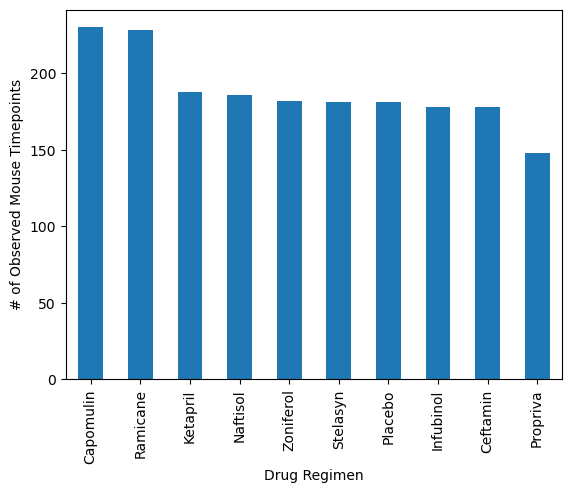

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x_values = pd.DataFrame(merged_mouse_clean["Drug Regimen"].unique())
y_values = pd.DataFrame(merged_mouse_clean["Drug Regimen"].value_counts().reset_index())
value_counts = pd.merge(x_values, y_values, left_on = 0, right_on = "index").drop(["index"], axis = 1)
value_counts.sort_values("Drug Regimen", ascending = False).plot.bar(x = 0, y = "Drug Regimen",
                        rot = 90, xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints", legend = None)
plt.show()
plt.close()

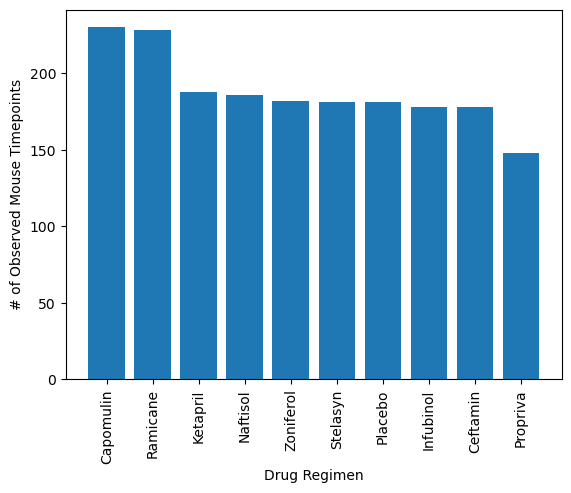

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = merged_mouse_clean["Drug Regimen"].unique()
observations = merged_mouse_clean["Drug Regimen"].value_counts()

plt.bar(regimen, observations)
tick_locations = [value for value in regimen]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"])
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

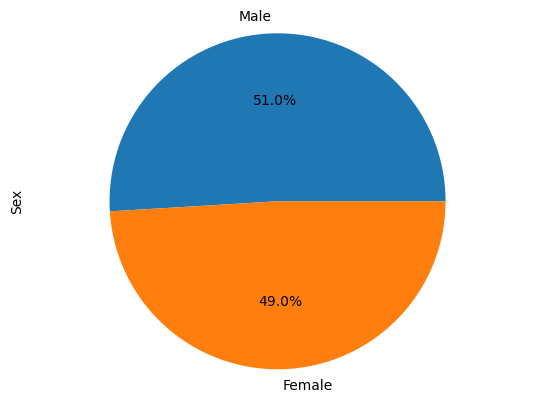

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merged_mouse_clean["Sex"].value_counts().plot.pie(autopct = "%0.1f%%")
plt.axis("equal")
plt.show()

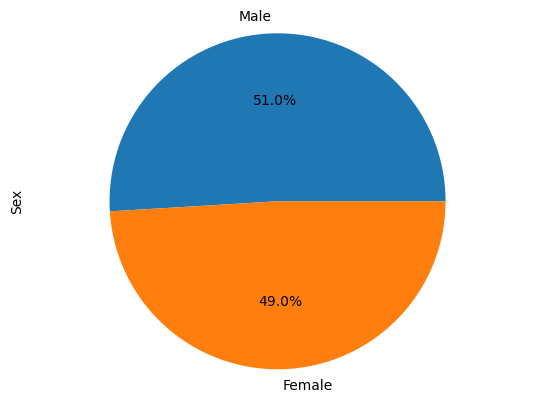

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(merged_mouse_clean["Sex"].value_counts(), autopct = "%0.1f%%", labels = ["Male", "Female"])
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(merged_mouse_clean.groupby("Mouse ID")["Timepoint"].max().reset_index())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_time = pd.merge(merged_mouse_clean, max_time, on=["Mouse ID", "Timepoint"], how="right")

In [23]:
#Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

for treatment in treatments:
    treatment_tumors = []
    outliers = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered = merged_max_time[merged_max_time["Drug Regimen"] == treatment]
    tumors = filtered["Tumor Volume (mm3)"].values.tolist()
    tumors.sort()
    tumor_series = pd.Series(tumors)
    quartile_one = tumor_series.quantile(.25)
    quartile_three = tumor_series.quantile(.75)
    interquartile_range = quartile_three - quartile_one
    lower_boundary = quartile_one - (1.5 * interquartile_range)
    upper_boundary = quartile_three + (1.5 * interquartile_range)
    #add subset
    tumor_volume.append(tumors)
    #Determine outliers using upper and lower bounds
    for volume in tumors:
        if volume < lower_boundary:
            outliers.append(volume)
        elif volume > upper_boundary:
            outliers.append(volume)
    print(f"{treatment}'s Interquartile Range: {interquartile_range}")
    print(f"{treatment}'s Potential Outliers: {outliers}")
    print("")

Capomulin's Interquartile Range: 7.781863460000004
Capomulin's Potential Outliers: []

Ramicane's Interquartile Range: 9.098536719999998
Ramicane's Potential Outliers: []

Infubinol's Interquartile Range: 11.477135160000003
Infubinol's Potential Outliers: [36.3213458]

Ceftamin's Interquartile Range: 15.577752179999997
Ceftamin's Potential Outliers: []



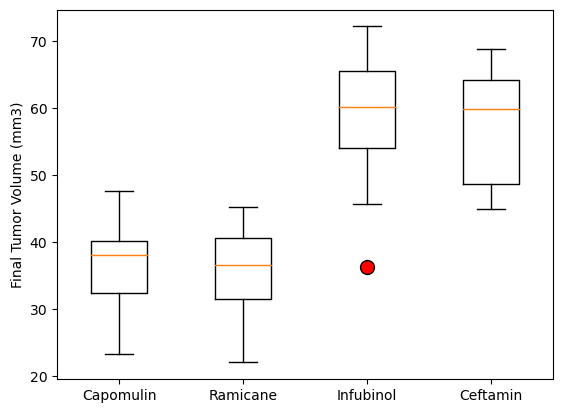

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels = treatments, flierprops = dict(markerfacecolor = "r", markersize = 10))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

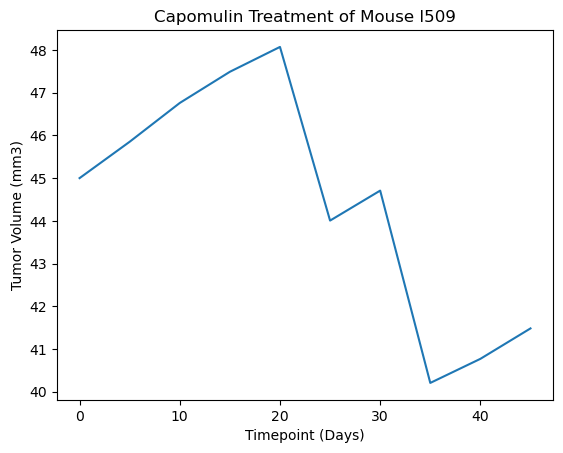

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#getting just the data for mouse l509
mousel509 = merged_mouse_clean[merged_mouse_clean["Mouse ID"] == "l509"]

#generating the line plot
plt.plot(mousel509["Timepoint"], mousel509["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

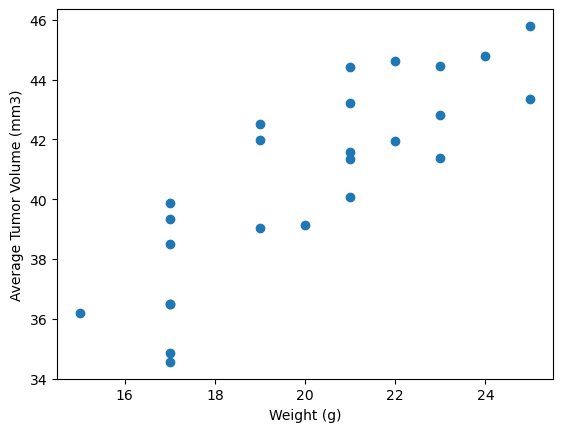

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#getting just the data for mice on the Capomulin Drug Regimen
capomulin_mice = merged_mouse_clean[merged_mouse_clean["Drug Regimen"] == "Capomulin"]

#generating the scatter plot
x_values = pd.DataFrame(capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean())
y_values = pd.DataFrame(capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


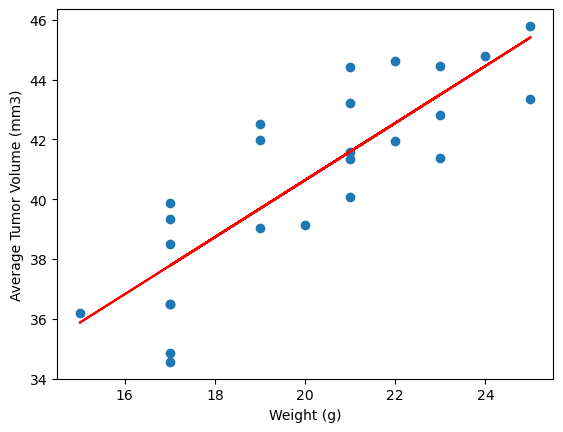

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coefficient = st.pearsonr(x_values.iloc[:,0], y_values.iloc[:,0])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coefficient[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values["Weight (g)"], y_values["Tumor Volume (mm3)"])
regression = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()